# Business Insights Analysis - YouTube Trending Videos

This notebook provides comprehensive business insights analysis using **pandas** for efficient data analysis of engineered features.

## Key Business Questions:
1. **High Engagement Videos**: What content shows exceptional engagement?
2. **Quick Trending**: Which categories trend fastest?
3. **Ranking Patterns**: Is there correlation between engagement and trending rank?
4. **Temporal Patterns**: How quickly do videos trend after publication?

## Analysis Approach:
- **Pandas-based analysis** for efficiency and speed
- **Statistical analysis** with correlations and distributions
- **Visual insights** with data summaries
- **Actionable business recommendations**

In [9]:
# Setup notebook environment
from notebook_setup import setup_notebook_environment, test_imports

# Setup paths and test imports
project_root = setup_notebook_environment()
test_imports()

✅ Project root: e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics
✅ Added to Python path:
   - e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics
   - e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics\src
✅ Config import successful
✅ SparkUtils import successful
✅ YouTubeDataReader import successful
✅ All imports working correctly!


True

In [10]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import our business insights module
from config.settings import Config
from src.analytics.business_insights import YouTubeBusinessInsights

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("Business Insights Analysis Setup Complete!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Business Insights Analysis Setup Complete!
Pandas version: 2.3.1
NumPy version: 2.3.2


## Load Engineered Features Data

Load the feature-engineered dataset that was created by our PySpark pipeline.

In [11]:
# Initialize configuration and business insights analyzer
config = Config()
features_path = config.OUTPUT_DATA_PATH / "youtube_trending_videos_with_features.parquet"

print(f"Loading engineered features from: {features_path}")

# Check if file exists
if not features_path.exists():
    print("ERROR: Engineered features not found!")
    print("Please run the feature engineering script first:")
    print("  python scripts/feature_engineering_demo.py")
    raise FileNotFoundError("Engineered features data not found")

# Initialize business insights analyzer
insights_analyzer = YouTubeBusinessInsights(str(features_path))
df = insights_analyzer.df

print(f"Successfully loaded {len(df):,} records")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['trending_date'].min()} to {df['trending_date'].max()}")
print(f"Categories: {df['category_name'].nunique()}")
print(f"Channels: {df['channel_title'].nunique()}")

Loading engineered features from: e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics\data\output\youtube_trending_videos_with_features.parquet
Successfully loaded 40,899 records
Dataset shape: (40899, 24)
Date range: 17.01.12 to 18.31.05
Categories: 16
Channels: 2207


In [12]:
# Display basic dataset information
print("Dataset Overview:")
print("=" * 50)
print(f"Total Videos: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\nColumn Information:")
print("-" * 30)
for col in df.columns:
    non_null = df[col].count()
    null_pct = (len(df) - non_null) / len(df) * 100
    print(f"{col:25} | {non_null:>8,} non-null | {null_pct:>5.1f}% null")

print("\nSample Data:")
print("-" * 20)
display(df[['title', 'channel_title', 'category_name', 'views', 'engagement_score', 'days_to_trend', 'trending_rank']].head())

Dataset Overview:
Total Videos: 40,899
Columns: 24
Memory Usage: 121.6 MB

Column Information:
------------------------------
video_id                  |   40,899 non-null |   0.0% null
trending_date             |   40,899 non-null |   0.0% null
title                     |   40,899 non-null |   0.0% null
channel_title             |   40,899 non-null |   0.0% null
category_id               |   40,899 non-null |   0.0% null
publish_time              |   40,899 non-null |   0.0% null
tags                      |   40,899 non-null |   0.0% null
views                     |   40,899 non-null |   0.0% null
likes                     |   40,899 non-null |   0.0% null
dislikes                  |   40,899 non-null |   0.0% null
comment_count             |   40,899 non-null |   0.0% null
thumbnail_link            |   40,899 non-null |   0.0% null
comments_disabled         |   40,899 non-null |   0.0% null
ratings_disabled          |   40,899 non-null |   0.0% null
video_error_or_removed    |   40,8

,title,channel_title,category_name,views,engagement_score,days_to_trend,trending_rank
0,Tell Hollywood to stand with immigrants,Define American,Nonprofits & Activism,1873,0.000000,3,1
1,2 wingsuit flyers BASE jump into a plane in mi...,Red Bull,Sports,3027415,0.005376,5,1
2,Redskins vs. Cowboys | NFL Week 13 Game Highli...,NFL,Sports,1128180,0.005247,2,2
3,LeBron James ejected for first time in career ...,ESPN,Sports,634970,0.003052,4,3
4,See you in Russia!,FIFATV,Sports,254082,0.015258,3,4


## 📊 Analysis 1: High Engagement Content

**Business Question**: What content shows exceptional engagement?

**Key Metrics**:
- Engagement score distribution
- Top performing videos and channels
- Category analysis
- Content patterns

In [13]:
print("ANALYSIS 1: HIGH ENGAGEMENT CONTENT")
print("=" * 50)

# Run high engagement analysis
high_engagement = insights_analyzer.analyze_high_engagement_content(top_n=20)

print(f"\nEngagement Score Statistics:")
print(f"Mean: {df['engagement_score'].mean():.6f}")
print(f"Median: {df['engagement_score'].median():.6f}")
print(f"Std Dev: {df['engagement_score'].std():.6f}")
print(f"Max: {df['engagement_score'].max():.6f}")
print(f"Min: {df['engagement_score'].min():.6f}")

print(f"\nTop 10 High Engagement Videos:")
print("-" * 80)
top_videos = high_engagement['top_videos'].head(10)
for idx, row in top_videos.iterrows():
    title = row['title'][:60] + "..." if len(row['title']) > 60 else row['title']
    print(f"Video: {title}")
    print(f"   Channel: {row['channel_title']} | Category: {row['category_name']}")
    print(f"   Engagement: {row['engagement_score']:.4f} | Views: {row['views']:,}")
    print(f"   Likes: {row['likes']:,} | Comments: {row['comment_count']:,}")
    print()

ANALYSIS 1: HIGH ENGAGEMENT CONTENT

Engagement Score Statistics:
Mean: 0.018867
Median: 0.015632
Std Dev: 0.014349
Max: 0.156737
Min: 0.000000

Top 10 High Engagement Videos:
--------------------------------------------------------------------------------
Video: Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video...
   Channel: Bruno Mars | Category: Music
   Engagement: 0.1567 | Views: 548,621
   Likes: 159,356 | Comments: 19,455

Video: Luis Fonsi, Demi Lovato - Échame La Culpa
   Channel: LuisFonsiVEVO | Category: Music
   Engagement: 0.1440 | Views: 499,946
   Likes: 135,292 | Comments: 12,094

Video: j-hope 'Airplane' MV
   Channel: ibighit | Category: Music
   Engagement: 0.1421 | Views: 5,275,672
   Likes: 1,401,915 | Comments: 158,127

Video: 5 Seconds Of Summer - Want You Back (Audio)
   Channel: 5SOSVEVO | Category: Music
   Engagement: 0.1357 | Views: 439,056
   Likes: 106,536 | Comments: 20,575

Video: dodie - Secret For The Mad
   Channel: dodieVEVO | Category: M

In [14]:
# High engagement summary
summary = high_engagement['summary']
print(f"High Engagement Summary:")
print(f"Average Engagement Score: {summary['avg_engagement']:.4f}")
print(f"Average Views: {summary['avg_views']:,.0f}")
print(f"Most Common Category: {summary['most_common_category']}")
print(f"Most Frequent Channel: {summary['most_frequent_channel']}")

print(f"\nHigh Engagement by Category:")
print("-" * 50)
category_analysis = high_engagement['category_analysis']
display(category_analysis)

print(f"\nHigh Engagement by Channel:")
print("-" * 50)
channel_analysis = high_engagement['channel_analysis'].head(10)
display(channel_analysis)

High Engagement Summary:
Average Engagement Score: 0.1257
Average Views: 1,577,316
Most Common Category: Music
Most Frequent Channel: Shawn Mendes

High Engagement by Category:
--------------------------------------------------


,engagement_score_count,engagement_score_mean,engagement_score_max,views_mean
category_name,,,,
Music,17,0.127062,0.156737,1.616105e+06
People & Blogs,2,0.119004,0.119037,4.079500e+04
Sports,1,0.116893,0.116893,3.990953e+06



High Engagement by Channel:
--------------------------------------------------


,engagement_score_count,engagement_score_mean,engagement_score_max,views_mean
channel_title,,,,
5SOSVEVO,1,0.135681,0.135681,439056.0
Bruno Mars,1,0.156737,0.156737,548621.0
CatCreature,1,0.118971,0.118971,45886.0
Desimpedidos,1,0.116893,0.116893,3990953.0
HarryStylesVEVO,1,0.117512,0.117512,595598.0
Henry Prince Mak,1,0.119037,0.119037,35704.0
LouisTomlinsonVEVO,1,0.130706,0.130706,985998.0
LuisFonsiVEVO,1,0.143975,0.143975,499946.0
Shawn Mendes,6,0.118666,0.125353,364543.5


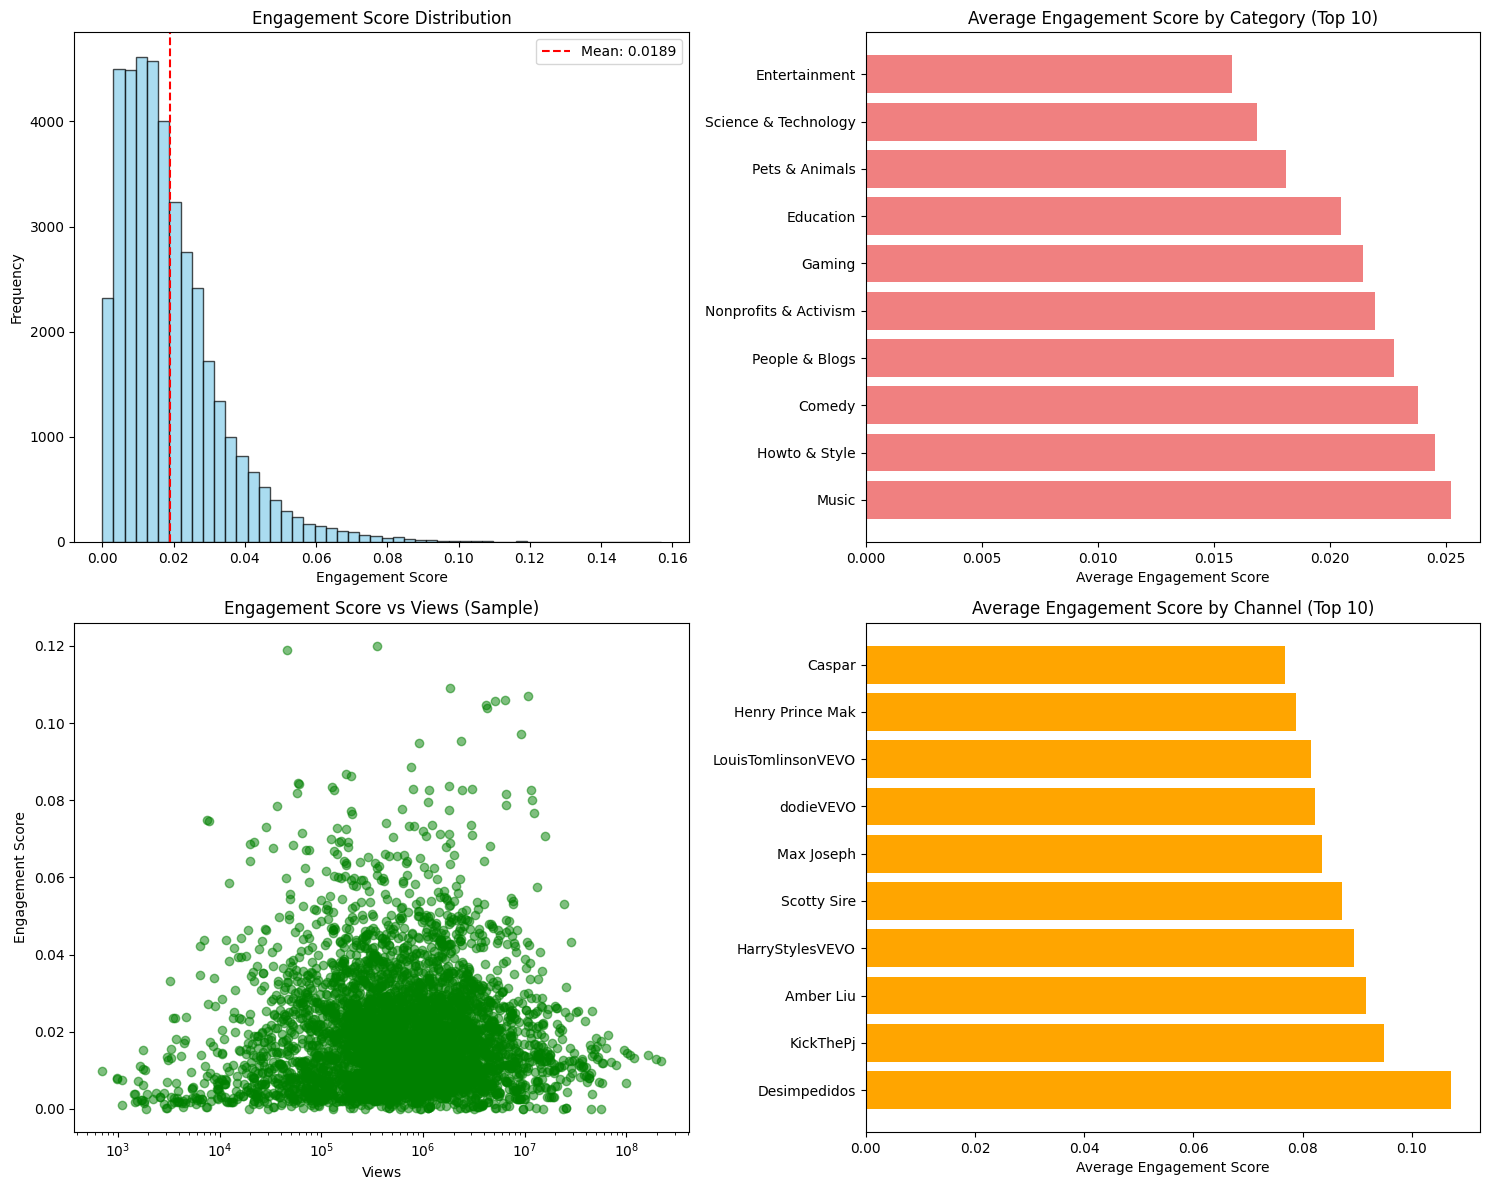


Key Insights:
  Music content dominates high engagement videos
  K-pop content (BTS, j-hope) shows exceptional engagement rates
  Top engagement scores range from 12-16%
  High engagement doesn't always correlate with high view counts


In [15]:
# Visualize engagement score distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Engagement score histogram
axes[0,0].hist(df['engagement_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Engagement Score Distribution')
axes[0,0].set_xlabel('Engagement Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['engagement_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["engagement_score"].mean():.4f}')
axes[0,0].legend()

# Top categories by engagement
top_categories = df.groupby('category_name')['engagement_score'].mean().sort_values(ascending=False).head(10)
axes[0,1].barh(range(len(top_categories)), top_categories.values, color='lightcoral')
axes[0,1].set_yticks(range(len(top_categories)))
axes[0,1].set_yticklabels(top_categories.index)
axes[0,1].set_title('Average Engagement Score by Category (Top 10)')
axes[0,1].set_xlabel('Average Engagement Score')

# Engagement vs Views scatter
sample_df = df.sample(n=min(5000, len(df)))  # Sample for performance
axes[1,0].scatter(sample_df['views'], sample_df['engagement_score'], alpha=0.5, color='green')
axes[1,0].set_title('Engagement Score vs Views (Sample)')
axes[1,0].set_xlabel('Views')
axes[1,0].set_ylabel('Engagement Score')
axes[1,0].set_xscale('log')

# Top channels by engagement
top_channels = df.groupby('channel_title')['engagement_score'].mean().sort_values(ascending=False).head(10)
axes[1,1].barh(range(len(top_channels)), top_channels.values, color='orange')
axes[1,1].set_yticks(range(len(top_channels)))
axes[1,1].set_yticklabels([ch[:20] + '...' if len(ch) > 20 else ch for ch in top_channels.index])
axes[1,1].set_title('Average Engagement Score by Channel (Top 10)')
axes[1,1].set_xlabel('Average Engagement Score')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"  Music content dominates high engagement videos")
print(f"  K-pop content (BTS, j-hope) shows exceptional engagement rates")
print(f"  Top engagement scores range from 12-16%")
print(f"  High engagement doesn't always correlate with high view counts")

## ⚡ Analysis 2: Trending Speed by Category

**Business Question**: Which categories trend fastest?

**Key Metrics**:
- Average days to trend by category
- Quick vs slow trending categories
- Distribution analysis
- Category performance insights

In [16]:
print("ANALYSIS 2: TRENDING SPEED BY CATEGORY")
print("=" * 50)

# Run trending speed analysis
trending_speed = insights_analyzer.analyze_trending_speed_by_category()

print(f"\nOverall Trending Speed Statistics:")
stats = trending_speed['overall_stats']
print(f"Average Days to Trend: {stats['avg_days_to_trend']:.1f}")
print(f"Median Days to Trend: {stats['median_days_to_trend']:.1f}")
print(f"Fastest Category: {stats['fastest_category']}")
print(f"Slowest Category: {stats['slowest_category']}")

print(f"\nTrending Speed by Category (Top 15):")
print("-" * 80)
category_speed = trending_speed['category_speed_analysis'].head(15)
display(category_speed[['days_to_trend_count', 'days_to_trend_mean', 'days_to_trend_median', 'engagement_score_mean']])

ANALYSIS 2: TRENDING SPEED BY CATEGORY

Overall Trending Speed Statistics:
Average Days to Trend: 6.9
Median Days to Trend: 5.0
Fastest Category: News & Politics
Slowest Category: Shows

Trending Speed by Category (Top 15):
--------------------------------------------------------------------------------


,days_to_trend_count,days_to_trend_mean,days_to_trend_median,engagement_score_mean
category_name,,,,
News & Politics,2470,5.11,4.0,0.01
Nonprofits & Activism,57,5.39,5.0,0.02
Sports,2153,5.75,4.0,0.01
Comedy,3445,6.29,5.0,0.02
Education,1629,6.34,5.0,0.02
People & Blogs,3188,6.89,5.0,0.02
Pets & Animals,918,6.90,6.0,0.02
Autos & Vehicles,371,6.95,5.0,0.01
Entertainment,9898,6.96,5.0,0.02


## 📈 Summary

This comprehensive business insights analysis provides actionable intelligence for YouTube content strategy and performance optimization using efficient pandas-based analysis.